# Análisis Cinemático del Manipulador RR
*Práctica 1. Robótica Industrial*

## Cálculo del problema cinemático directo
Con las herramientas tan simples que hemos utilizado en esta fase anterior, podemos ya realizar un análisis de problemas robóticos. Por ejemplo, podríamos dibujar 21 puntos de la trayectoria que recorre un efector de un **manipulador tipo RR** (por Rotación-Rotación, es decir, sus dos articulaciones son de rotación). 

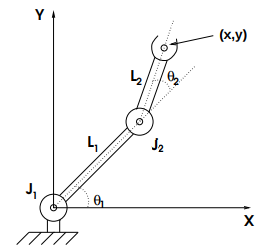

Supongamos que sus enlaces tienen longitud $L_1 = L_2 = 1$, y las variables de rotación $\theta_1$ y $\theta_2$ varían uniformemente de 0 a $\pi/2$. Sabemos que las ecuaciones de la trayectoria son las siguientes: 
$$p_x = L_1\cos(\theta_1) + L_2\cos(\theta_1+\theta_2)$$
$$p_y = L_1\sin(\theta_1) + L_2\sin(\theta_1+\theta_2)$$

Podemos dibujar todos los puntos de la trayectoria mediante el código: 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

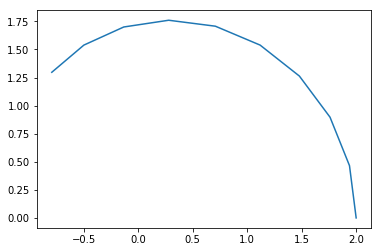

In [2]:
L1=1
L2=1
th1=np.arange(0, np.pi/2, np.pi/20)
th2=np.arange(0, np.pi/2, np.pi/20)
px=L1*np.cos(th1)+L2*np.cos(th1+th2)
py=L1*np.sin(th1)+L2*np.sin(th1+th2)
plt.plot(px,py)

## Función para el Problema Cinemático Directo
Cuando utilizamos algunas de las funciones varias veces, es conveniente definir funciones que realicen esa tarea, para conseguir una limpieza de código. En Jupyter, las funciones se definen de la misma forma que en Python convencional, es decir, utilizando el comando **def**. Para definir una función que calcule la trayectoria anterior podemos escribir: 

In [3]:
def pcd(L1, L2, th1, th2):
   # Cuerpo de la función
    px=L1*np.cos(th1)+L2*np.cos(th1+th2)
    py=L1*np.sin(th1)+L2*np.sin(th1+th2)
    return np.c_[px.reshape(-1,1), py.reshape(-1,1)]


Al final, debemos juntar los vectores `px` y `py` en una matriz de tipo `np.array`, de forma que la primera columna `p[:,0]` contenga los valores $x$ y `p[:,1]` los valores de $y$. De este modo, el código anterior nos quedaría:

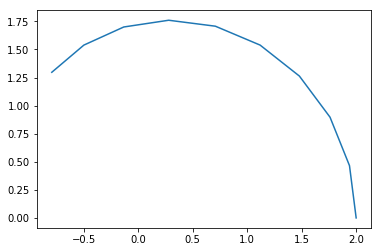

In [4]:
p = pcd(1,1, th1,th2)
fig, ax = plt.subplots()
ax.plot(p[:,0], p[:,1])

Es **importante** que veas que esta vez hemos utilizado ĺa función `plt.subplots()` para generar una figura (`fig`) y un objeto "ejes" dentro de la figura (`ax`), en lugar de usar directamente `plt.plot()`. Esto será muy útil más adelante, puesto que podremos especificar siempre el eje sobre el que queremos pintar. 

## Configuración espacial del robot
Hasta ahora sólo hemos dibujado la trayectoria que sigue el efector del robot. Sin embargo, nos puede ser de utilidad ver la configuración del robot (variables de articulación) en cada momento de la trayectoria. Para ello, podemos crear una función que nos muestre el robot, dados los parámetros del robot $L_1$, $\theta_1$ y la posición del efector `p` (un vector que contiene `px` y `py` en ese instante). Esta función tendría una forma similar a: 

In [5]:
def robot(L1,th1,p, ax):
    x=[0, L1*np.cos(th1), p[0]]
    y=[0, L1*np.sin(th1), p[1]]
    ax.plot(x,y, color='k', linewidth=2)
    ax.axis([-2, 2, -2, 2])
    
    ax.set_aspect('equal')

El código anterior muestra una línea que va desde el origen de coordenadas $(0,0)$ donde está situada la primera articulación $J_1$ hasta la segunda articulación del robot $J_2$, y luego hasta el punto final del mismo. Hemos aumentado el grosor de esta línea y cambiado el color a negro (k) para diferenciarlo bien de la trayectoria. Usaremos el objeto ejes (`ax`), que contiene las funciones `plot`, `axis` y `set_aspect`, para dibujar, establecer los límites y mantener la misma proporción en los ejes $x$ e $y$ todo el rato. 

**Ahora podemos probar a pintar el robot con una determinada configuración espacial, por ejemplo, $\theta_1=30^{\circ}$ y $\theta_2=60^{\circ}$. **

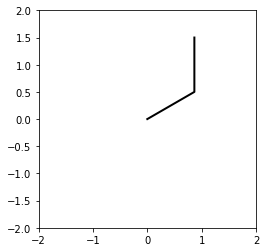

In [6]:
fig, ax = plt.subplots()
p=pcd(1,1, np.radians(30),np.radians(60))
robot(1,np.radians(30),p[0], ax)

**Ejercicio (20 pts)**. Mezclar las dos imágenes anteriores, representando la trayectoria hasta un determinado punto y el brazo robótico en dicho punto. Completa el siguiente código para hacerlo. Recuerda que para pintar el robot solo tenemos que darle el último valor de `th1` y de `p`.

In [7]:
L1=1
L2=1
punto = 20
Npuntos = 50
th1=np.arange(0, punto*np.pi/(2*Npuntos), np.pi/Npuntos)
th2=np.arange(0, punto*np.pi/(2*Npuntos), np.pi/Npuntos)
p = pcd(L1,L2,th1,th2)

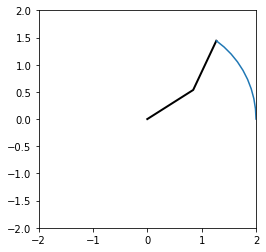

In [8]:
fig,ax = plt.subplots() # creamos la figura y sus ejes
#Código del ejercicio
robot(1,th1[-1], p[-1],ax)
ax.plot(p[:,0], p[:,1])

## Trazado de la Trayectoria
Para visualizar mejor la trayectoria, vamos a construir una animación. Para ello, importamos las herramientas necesarias.


In [9]:
from matplotlib import animation
from IPython.display import HTML 

Para realizar la animación necesitamos crear los diferentes *frames* de la misma, y para ello necesitamos crear una figura y unos ejes (`fig`, `ax`) que habrá que limpiar en cada frame. Para ello, utilizaremos la función `init`:

In [10]:
def init():
    ax.clear() # Limpiamos los ejes actuales
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_xlim(-2,2) # Establece los límites del eje x
    ax.set_ylim(-2,2) # y del eje y
    ax.set_aspect('equal') # Hace que la proporción de ambos ejes sea 1:1

Ahora tenemos que definir la función `pintarPCD` que es la que va a producir la animación, integrando las funciones `plot` y `robot`.

In [11]:
def pintarPCD(i, L1, L2, Npuntos,ax):
    init()
    # Resto de código para elegir el punto actual (i), pintar la trayectoria hasta el punto actual y
    # pintar el robot en esa configuración. 
    #Código del ejercicio
    th1=np.arange(0, np.pi/2, np.pi/(2*Npuntos))
    th2=np.arange(0, np.pi/2, np.pi/(2*Npuntos))
    
    p = pcd(1,1,th1,th2)
    
    robot(1,th1[i], p[i],ax)
    ax.plot(p[:i,0], p[:i,1])

Tras esto, crearemos la animación con el siguiente código. A la función `FuncAnimation` le pasaremos una serie de parámetros. El primero será `fig`, que será la figura donde se muestre toda la animación, y que ya hemos creado anteriormente. Después hemos puesto la función que realiza la animación, en nuestro caso se llama `pintarPCD` y ha sido definida en la anterior pieza de código. Después se le pasa el número de frames que se va a usar. Este número de frames es el parámetro `i` que recibe la función `pintarPCD`. El siguiente parámetro se llama `fargs`. que son los argumentos restantes que le pasamos a la función `pintarPCD`, en este caso (0, 1, `N`) son los valores para 'L1', 'L2', 'Npuntos' en la función `pintarPCD`. Y lo último que aparece es el parámetro `interval` que indica el intervalo entre frames en milisegundos.

**Ejercicio (30 pts): Tras todas estas funciones, convertimos la animación `anim` en un video reproducible en HTML5, y lo reproducimos con el comando `HTML(anim.to_html5_video())`.** 

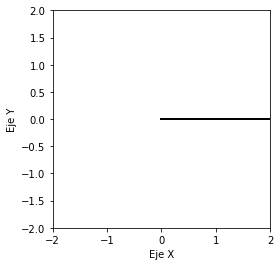

In [12]:
N=30
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, pintarPCD, frames = N, fargs = (1, 1, N, ax), interval = 30) 
HTML(anim.to_jshtml())

## Problema Cinemático Inverso
Quizá te habrás preguntado (seguro que sí) si conocer de antemano las variables de articulación es lo normal. Por supuesto que no. Normalmente, el problema es precisamente conocer las variables de articulación a partir del punto donde queremos que esté el actuador del robot. Esto es lo que se conoce como **Problema Cinemático Inverso** (PCI). Las ecuaciones del PCI para el robot RR son: 

$$ \cos\theta_2 = \frac{x^2+y^2-L_1^2 -L_2^2}{2L_1 L_2}$$

$$ \tan\theta_1 = \frac{y(L_1 + L_2\cos\theta_2)-xL_2\sin\theta_2}{x(L_1 + L_2\cos\theta_2)+yL_2\sin\theta_2}$$

Ahora vamos a representar trayectorias. Para ello utilizaremos una aproximación de trayectoria rectilínea. De esta forma, los puntos por los que pasa el actuador se pueden parametrizar como: 

$$ x_n = x_{ini} + \frac{x_{fin}-x_{ini}}{N}n$$

$$ y_n = y_{ini} + \frac{y_{fin}-y_{ini}}{N}n$$

donde $n=0,1\dots N$ y $n$ representa el numero de punto en una trayectoria de `N+1` puntos. 

**Ahora vamos a escribir un programa que simule el movimiento del robot y dibuje la trayectoria (similar al realizado en el apartado anterior) para un movimiento rectilíneo entre dos puntos cualesquiera. Para ello, se utilizara la función `robot` de los apartados anteriores y se construira una nueva función `pci` que implemente las ecuaciones del PCI.  Debe tenerse en cuenta que las funciones `np.arccos` y `np.arctan` de NumPy toman valores en los intervalos $(0, \pi)$ y $(-\pi/2,\pi/2)$ respectivamente**. 

In [13]:
def pci(L1,L2,x,y):
    # Devuelve un array con los valores de th1 y th2 para las posiciones (x,y). 
    cos_th2 = (x**2 + y**2 - L1**2 - L2**2) / (2*L1*L2)
    th2 = np.arccos(cos_th2)
    th1 = np.arctan( (y*(L1 + (L2 * cos_th2)) - (x * L2 * np.sin(th2)))
                     / (x*(L1 + (L2 * cos_th2)) + (y * L2 * np.sin(th2))))
    
    return np.c_[th1.reshape(-1,1), th2.reshape(-1,1)]


In [14]:
def pintarPCI1(i, L1, L2, pini, pfin, Npuntos,ax):
    # Pinta la trayectoria actual y la posición actual del robot calculada con pci
    # Podemos acceder a p (variable global) desde dentro de la función. 
    init()
    
    px = np.arange(Npuntos)
    py = np.arange(Npuntos)
    
    xn = pini[0] + ((pfin[0]-pini[0])/Npuntos)*px
    yn = pini[1] + ((pfin[1]-pini[1])/Npuntos)*py
    p = pci(L1,L2,xn,yn)
    robot(1,p[i][0], [xn[i],yn[i]],ax)
    ax.plot(xn[:i], yn[:i])

Probaremos las siguientes trayectorias: 

- **Trayectoria 1 (10 pts)**: $(x_{ini}, y_{ini})=(2,0)$ y $(x_{fin}, y_{fin})=(0,2)$

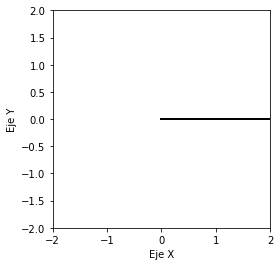

In [15]:
# Genera la trayectoria y su correspondiente animación, y la muestra con HTML(anim.to_html5_video())
N=30
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, pintarPCI1, frames = N, fargs = (1, 1,[2,0],[0,2], N, ax), interval = 30) 
HTML(anim.to_jshtml())


- **Trayectoria 2 (20 pts)**: $(x_{ini}, y_{ini})=(1,1)$ y $(x_{fin}, y_{fin})=(-1,0)$. 

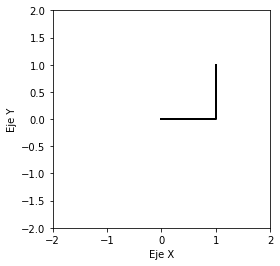

In [16]:
# Prueba a utilizar el mismo código anterior con estos nuevos valores x_ini, y_ini, x_fin, y_fin
N=30
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, pintarPCI1, frames = N, fargs = (1, 1,[1,1],[-1,0], N, ax), interval = 30) 
HTML(anim.to_jshtml())

Verás que no funciona correctamente. Esto sucede porque la función `arctan` no determina correctamente el cuadrante de la solución. Esto causa problemas de continuidad, por lo que debemos utilizar la función `arctan2` para sustituir a la anterior. Utiliza la ayuda para conocer los parámetros de esta función, y reescribe la función `pci` y `pintarPCI` para poder utilizarlas. 

In [17]:
# Define aquí tu nueva función pci2 y pintarPCI2:
def pci2(L1,L2,x,y):
    # Devuelve un array con los valores de th1 y th2 para las posiciones (x,y). 
        # Devuelve un array con los valores de th1 y th2 para las posiciones (x,y). 
    cos_th2 = (x**2 + y**2 - L1**2 - L2**2) / (2*L1*L2)
    th2 = np.arccos(cos_th2)
    th1 = np.arctan2((y*(L1 + (L2 * cos_th2)) - (x * L2 * np.sin(th2))),
                     (x*(L1 + (L2 * cos_th2)) + (y * L2 * np.sin(th2))))
    return np.c_[th1.reshape(-1,1), th2.reshape(-1,1)]

def pintarPCI2(i, L1, L2, pini, pfin, Npuntos, ax):
    # Igual que pintarPCI1 pero llamando a pci2. 
    init()
    
    px = np.arange(Npuntos)
    py = np.arange(Npuntos)
    
    xn = pini[0] + ((pfin[0]-pini[0])/Npuntos)*px
    yn = pini[1] + ((pfin[1]-pini[1])/Npuntos)*py
    p = pci2(L1,L2,xn,yn)
    robot(1,p[i][0], [xn[i],yn[i]],ax)
    ax.plot(xn[:i], yn[:i])
    

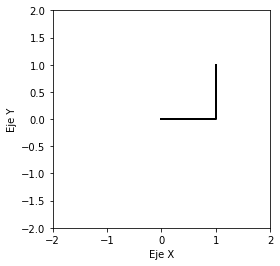

In [18]:
# Calcula la trayectoria y pintala de nuevo, con los nuevos pci2 y pintarPCI2. 
N=30
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, pintarPCI2, frames = N, fargs = (1, 1,[1,1],[-1,0], N, ax), interval = 30) 
HTML(anim.to_jshtml())

- **Trayectoria 3 (20 pts)**: $(x_{ini}, y_{ini})=(1,0)$ y $(x_{fin}, y_{fin})=(-1,0)$. 

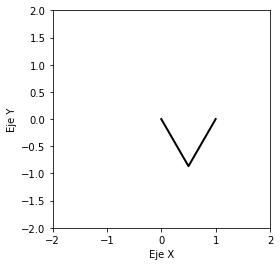

In [19]:
# Prueba a usar de nuevo el código anterior con estos nuevos valores x_ini, y_ini, x_fin, y_fin
N=30
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, pintarPCI2, frames = N, fargs = (1, 1,[1,0],[-1,0], N, ax), interval = 30) 
HTML(anim.to_jshtml())

Como ves, volvemos a tener problemas de continuidad. Esto es porque la función $\arccos$ devuelve dos resultados: el ángulo positivo que nos devuelve `arccos()`, y el mismo pero con signo negativo. Para escoger una solución u otra, puede tomarse el siguiente criterio: dado que $\theta_1$ se obtiene a partir de $\theta_2$, es lógico seleccionar la solución de $\arccos(\theta_2)$ que hace que el incremento en $\theta_1$ desde el punto anterior de la trayectoria al actual sea el menor posible.


In [20]:
# Define aquí tu nueva función pci3 y pintarPCI3

def pci3(L1, L2, x, y, incr_ant):
    # Devuelve un array con los valores de th1 y th2 para las posiciones (x,y). 
    # Devuelve un array con los valores de th1 y th2 para las posiciones (x,y). 
    cos_th2 = (x**2 + y**2 - L1**2 - L2**2) / (2*L1*L2)
    th2 = np.arccos(cos_th2)
    th2_n = -th2
    
    th1 = np.arctan2((y*(L1 + (L2 * cos_th2)) - (x * L2 * np.sin(th2))),
                     (x*(L1 + (L2 * cos_th2)) + (y * L2 * np.sin(th2))))
    
    th1_n = np.arctan2((y*(L1 + (L2 * cos_th2)) - (x * L2 * np.sin(th2))),
                     (x*(L1 + (L2 * cos_th2)) + (y * L2 * np.sin(th2))))
    
    th2_r = th2 if abs()
    return np.c_[th1.reshape(-1,1), th2.reshape(-1,1)]

def pintarPCI3(i, L1, L2, pini, pfin, Npuntos, ax):
    # Igual que pintarPCI1 pero llamando a pci2. 
    init()
    incr = 0
    
    px = np.arange(Npuntos)
    py = np.arange(Npuntos)
    
    xn = pini[0] + ((pfin[0]-pini[0])/Npuntos)*px
    yn = pini[1] + ((pfin[1]-pini[1])/Npuntos)*py
    p = pci2(L1,L2,xn,yn)
    robot(1,p[i][0], [xn[i],yn[i]],ax)
    ax.plot(xn[:i], yn[:i])
    

In [21]:
# Calcula la trayectoria y pintala de nuevo, con los nuevos pci3 y pintarPCI3. 